In [32]:
import os
import matplotlib.pyplot as plt

import pdb
import numpy as np
import pandas as pd
from utils.logger import Logger

from utils.dataset import BraTSDataset
from utils.transforms import tumor_seg_transform

In [33]:
mri_contrasts = ["FLAIR", "T1w", "T1Gd", "T2w"]
miss_prob_expected = [0.40, 0.12, 0.30, 0.15]
mask_root_dir = "/scratch1/sachinsa/data/masks/brats2017"
RANDOM_SEED = 0
fig_save_dir = os.path.join("..", "figs", f"mask")

logger = Logger(log_level='DEBUG')

[INFO] Logging level is: DEBUG


### Load masks

In [34]:
from utils.mask import verify_mask_algo

for section in ['train', 'val']:
    logger.debug(section)
    if section == 'train':
        mask_df = pd.read_csv(os.path.join(mask_root_dir, "train_mask.csv"), index_col=0)
    else:
        mask_df = pd.read_csv(os.path.join(mask_root_dir, "val_mask.csv"), index_col=0)
    logger.debug(mask_df.shape)
    print(mask_df.head())
    verify_mask_algo(mask_df.values, miss_prob_expected)

[DEBUG] train
[DEBUG] (386, 4)
     FLAIR    T1w   T1Gd    T2w
277  False  False  False  False
471  False  False  False  False
35   False  False  False  False
43   False  False   True   True
236   True  False  False  False
[DEBUG] Actual: {'FLAIR': 0.39896373056994816, 'T1w': 0.11398963730569948, 'T1Gd': 0.3160621761658031, 'T2w': 0.17357512953367876}
[DEBUG] Expected: {'FLAIR': 0.4, 'T1w': 0.12, 'T1Gd': 0.3, 'T2w': 0.15}
[INFO] MSE: 0.00021274463743993163
[DEBUG] Excellent! No all-mask rows present!
[DEBUG] val
[DEBUG] (97, 4)
     FLAIR    T1w   T1Gd    T2w
429  False  False  False  False
371  False  False  False  False
22   False  False  False  False
60   False  False   True   True
128   True  False  False  False
[DEBUG] Actual: {'FLAIR': 0.4020618556701031, 'T1w': 0.12371134020618557, 'T1Gd': 0.27835051546391754, 'T2w': 0.21649484536082475}
[DEBUG] Expected: {'FLAIR': 0.4, 'T1w': 0.12, 'T1Gd': 0.3, 'T2w': 0.15}
[INFO] MSE: 0.0012270724837921143
[DEBUG] Excellent! No all-mask rows p

In [35]:
mask_df = pd.read_csv(os.path.join(mask_root_dir, "train_mask.csv"), index_col=0)
mask_vals = mask_df.values
print(mask_vals.shape)

(386, 4)


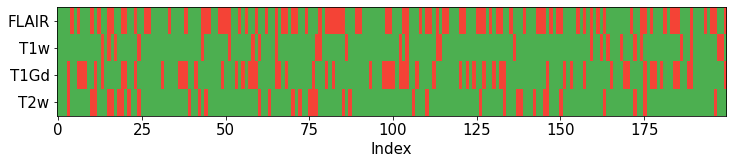

In [38]:
VERTICAL = False
colors = ['#4CAF50', '#F44336'] 
cmap = plt.matplotlib.colors.ListedColormap(colors)

if VERTICAL:
    plt.figure(figsize=(2, 12))
    plt.imshow(mask_vals, cmap=cmap, aspect='auto')
else:
    plt.figure(figsize=(12, 2))
    plt.imshow(mask_vals.T[:,:200], cmap=cmap, aspect='auto')
# plt.title('Distribution of mask', fontsize=15)
# ax = plt.gca()
# ax.yaxis.set_ticks_position('top') 
# ax.yaxis.set_label_position('top') 
plt.xticks(fontsize=15)
plt.xlabel('Index', fontsize=15)
plt.yticks(ticks=np.arange(len(mri_contrasts)), labels=mri_contrasts, fontsize=15)


plt.savefig(os.path.join(fig_save_dir, "mask.png"), facecolor='white')
plt.show()

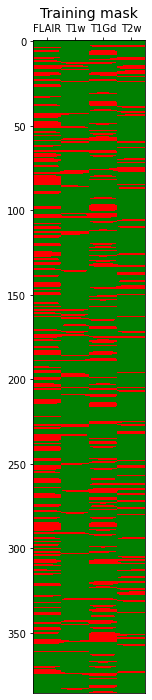

In [37]:
VERTICAL = True
colors = ['green', 'red'] 
cmap = plt.matplotlib.colors.ListedColormap(colors)

plt.figure(figsize=(2, 12))
if not VERTICAL:
    mask_vals = mask_vals.T
plt.imshow(mask_vals, cmap=cmap, aspect='auto')
plt.title('Training mask', fontsize=14)
ax = plt.gca()
ax.xaxis.set_ticks_position('top') 
ax.xaxis.set_label_position('top') 
plt.xticks(ticks=np.arange(len(mri_contrasts)), labels=mri_contrasts, fontsize=10)

plt.show()